In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red"><b>ch2. 군집분석</b></font>
# 1절. 군집모델(클러스터링)
-클러스터(cluster) : 독립변수의특성이유사한데이터의그룹
-클러스터링(clustering) : 주어진데이터를여러개의클러스터로구분하는것
1) 중심기반클러스터링(K-Means) : https://commons.wikimedia.org/wiki/File:KMeans-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e5/KMeans-Gaussian-data.svg"
style="display: block; margin-left: 0; width: 20%;">
2) 연결기반클러스터링(DBSCAN) : https://commons.wikimedia.org/wiki/File:DBSCAN-density-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/0/05/DBSCAN-density-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">
3) 밀도기반클러스터링(DBSCAN의변형으로OPTICS) : https://commons.wikimedia.org/wiki/File:OPTICS-Gaussian-data.svg
<img src="https://upload.wikimedia.org/wikipedia/commons/8/8a/OPTICS-Gaussian-data.svg"
width="300"
style="display: block; margin-left: 0; width: 20%;">

In [2]:
import os
os.environ['OMR_NUM_THREADS'] = '1'
# sklearn의 로직들이 멀티 스레드로 진행 -> 단일 스레드로 진행되도록

# 2절. K-Means 클러스터링
- 가장 단순하고 빠른 클러스터링 알고리즘
- 클러스터의 중심을 찾아가는 알고리즘
- 교안 p6

In [3]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [4]:
# 분류를 위한 가상의 데이터 생성
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=20, # 데이터 개수(기본값 100)
                           n_features=2, # 독립변수 개수(기본값 20)
                           n_informative=2, # 종속변수에 영향을 미치는 독립변수 개수(기본값 2)
                           n_redundant=0, # 종속변수의 영향을 미치지 않는 독립변수 개수(기본값 2)
                           n_clusters_per_class=1, # 각 종속변수 그룹 별 서브그룹이 없음
                           n_classes=2, # 종속변수의 그룹 수
                           random_state=123
                          )
import numpy as np
np.c_[X, y][:3]

array([[ 1.03859554,  2.51175389,  0.        ],
       [ 1.00271366,  1.93521549,  0.        ],
       [-1.6881048 ,  0.02599427,  1.        ]])

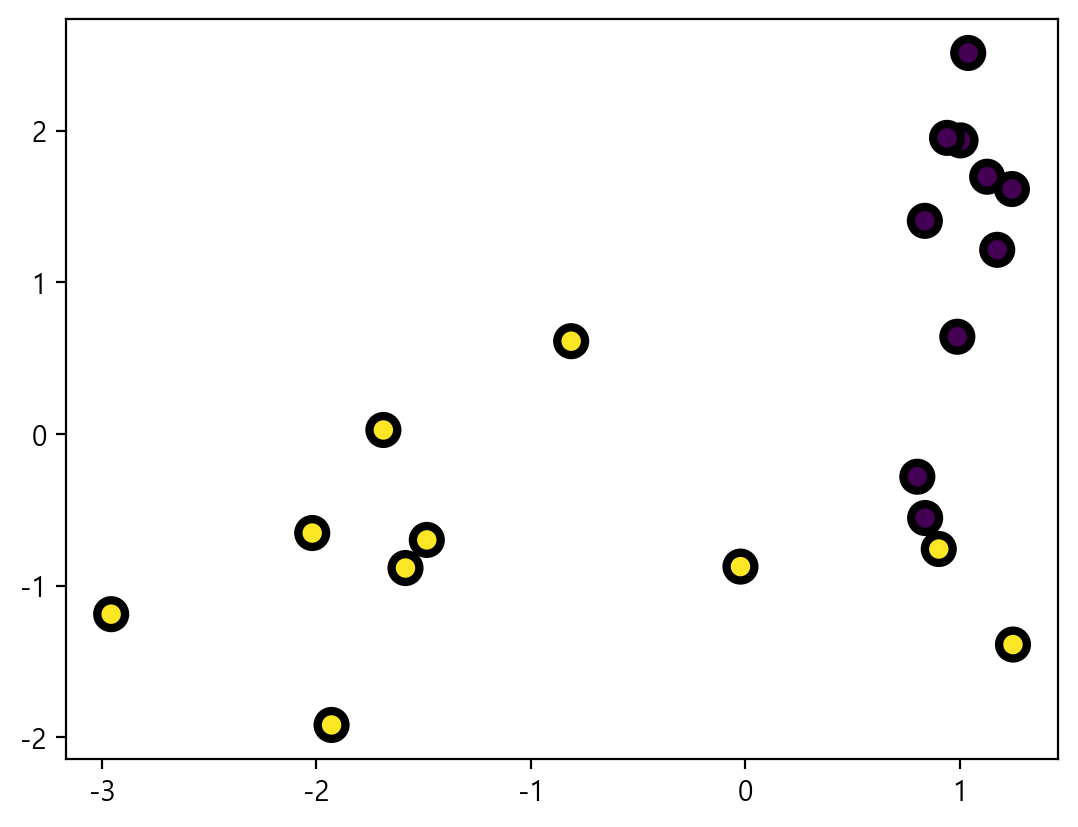

In [5]:
plt.scatter(x=X[:,0],
            y=X[:,1], c=y, s=100, edgecolors='k', lw=3)
plt.show()

In [6]:
from sklearn.cluster import KMeans
model  = KMeans(n_clusters=2, # 군의 개수
                init='k-means++', # 초기 중심을 서로 멀리 초기화 / random(초기중심점랜덤)
                n_init=10, # 각 다른 초기값을 10번 실행해보고 가장 좋은 모델 선택
                max_iter=300) # 각 실행에서 300번 반복(중심 옮기기)
model.fit(X)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10)

In [7]:
c0, c1 = model.cluster_centers_ # 모델이 정한 두 중심점
print(c0)
print(c1)

[1.01138251 0.83200493]
[-1.56258716 -0.69768199]


In [8]:
print('modelLabel : ', model.labels_)
pred = model.predict(X)
print("  예 측 값 : ", pred)
print("  실 제 값 : ", y)

modelLabel :  [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  예 측 값 :  [0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0]
  실 제 값 :  [0 0 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0]


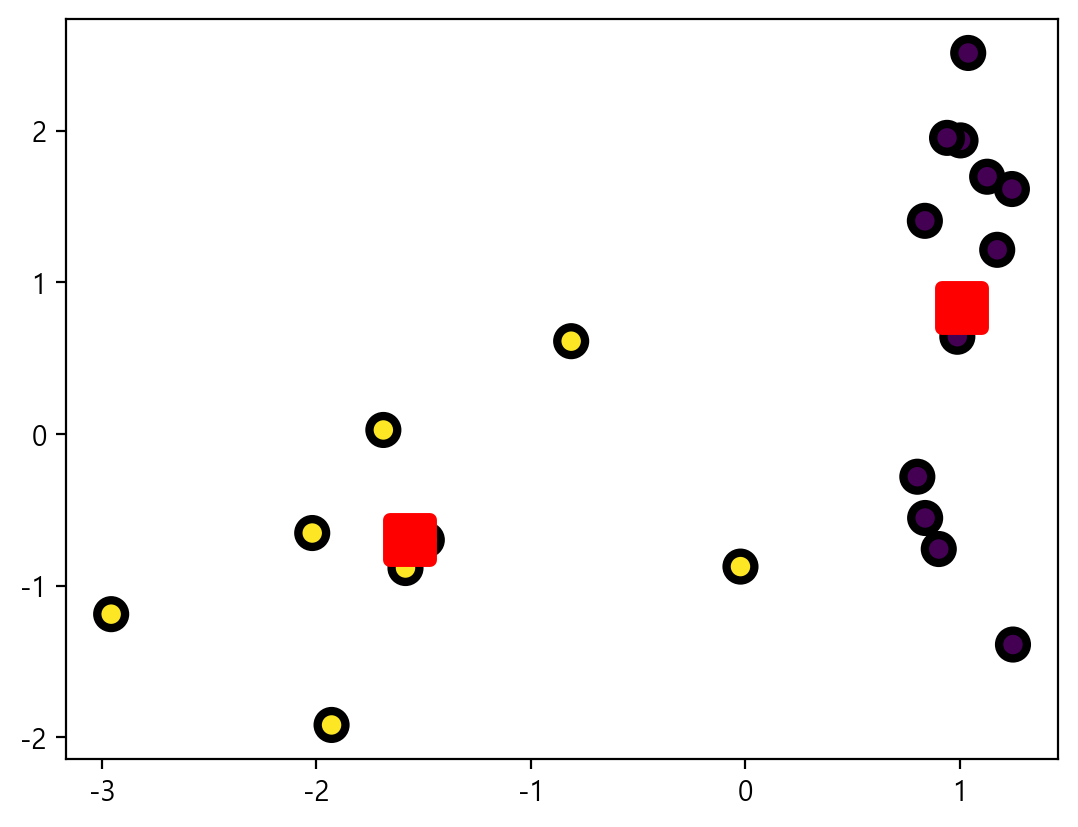

In [9]:
plt.scatter(x=X[:,0], y=X[:,1], c=pred, s=100, edgecolors='k', lw=3)
plt.scatter(x=c0[0], y=c0[1], s=200, marker='s', lw=5, c='r')
plt.scatter(x=c1[0], y=c1[1], s=200, marker='s', lw=5, c='r')
plt.show()

## Normalizer 적용

In [10]:
import pandas as pd
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
Xnor = scaler.fit_transform(X)
np.c_[X, Xnor][:3]

array([[ 1.03859554,  2.51175389,  0.3821159 ,  0.92411441],
       [ 1.00271366,  1.93521549,  0.46005267,  0.88789162],
       [-1.6881048 ,  0.02599427, -0.99988146,  0.01539667]])

In [11]:
model = KMeans(n_clusters=2, # 군의 갯수
              init="k-means++", #초기중심을 서로 멀리 초기화. random(초기중심점랜덤)
              n_init=10, # 각 다른 초기값을 10번 실행해보고 가장 좋은 모델 선택
              max_iter=300) # 각 실행에서 300번 반복(중심 옮기기)
model.fit(Xnor)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10)

In [12]:
model.labels_ # 모델이 그룹핑한 결과

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [13]:
d0, d1 = model.cluster_centers_ # 모델이 정한 중심점
print(d0, d1)

[-0.77398837 -0.33522479] [0.64128684 0.34902823]


In [14]:
Xnor[model.labels_==0]

array([[-0.99988146,  0.01539667],
       [-0.02648361, -0.99964925],
       [-0.7090575 , -0.70515067],
       [-0.79903769,  0.60128094],
       [-0.90485891, -0.42571159],
       [-0.92787221, -0.37289833],
       [-0.87327958, -0.48721942],
       [-0.95143599, -0.30784666]])

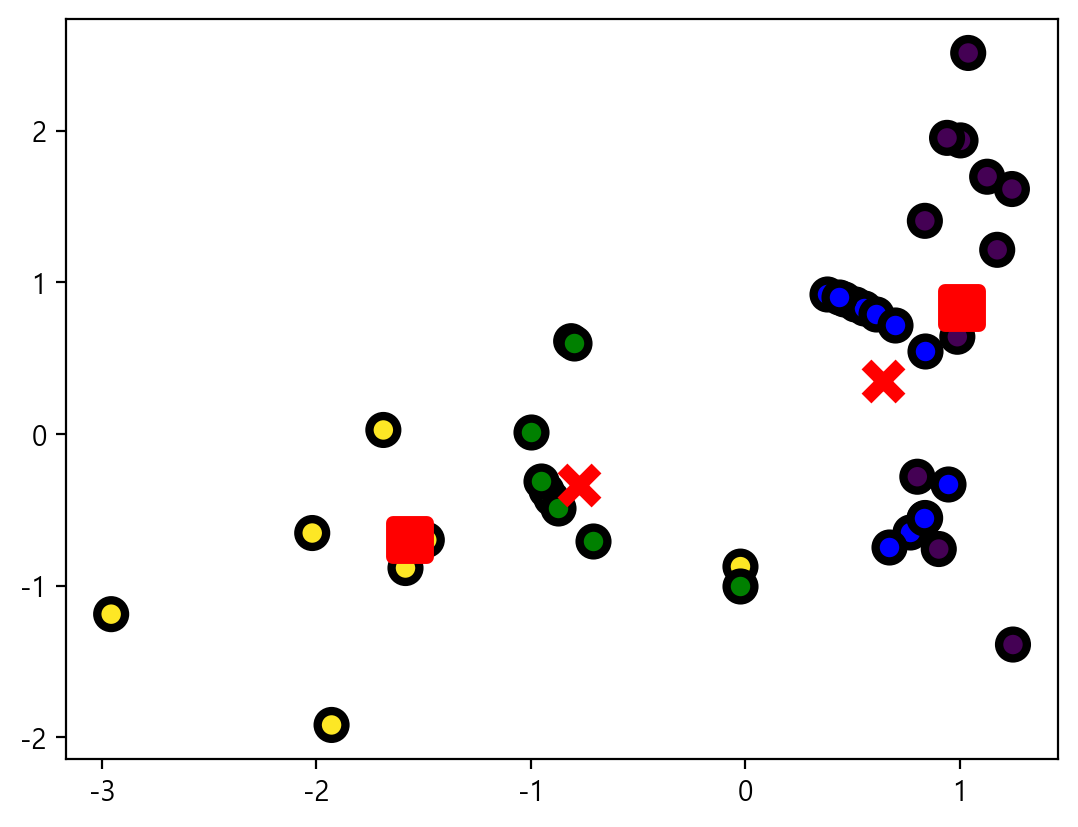

In [15]:
plt.scatter(x=X[:,0], y=X[:,1], c=pred, s=100, edgecolors='k', lw=3 )
plt.scatter(x=c0[0], y=c0[1], s=150, marker='s', lw=5, c='r')
plt.scatter(x=c1[0], y=c1[1], s=150, marker='s', lw=5, c='r')

plt.scatter(x=Xnor[model.labels_==0,0], 
            y=Xnor[model.labels_==0,1], 
            c='g', s=100, edgecolors='k', lw=3 )
plt.scatter(x=Xnor[model.labels_==1,0], 
            y=Xnor[model.labels_==1,1], 
            c='b', s=100, edgecolors='k', lw=3 )
plt.scatter(x=d0[0], y=d0[1], s=150, marker='x', lw=5, c='r')
plt.scatter(x=d1[0], y=d1[1], s=150, marker='x', lw=5, c='r')

plt.show()

## K-Means 클러스터링의 한계점(p13)
- 군의 특성이 다를 경우
    * 크기
    * 군의 밀도
    * 비구형
- 이상치를 포함할 경우 : 이상치를 조정하거나 삭제한 후 클러스터링
### 군의 크기가 다른 경우

In [16]:
import numpy as np
np.random.seed(0)
# 평균 : -10, 표준편차 : 2인 10행 2열 데이터 : group0
group0 = np.random.normal(loc=-10, scale=2, size=(10,2))
y = np.full(group0.shape[0],0)
group0 = np.c_[group0, y]
group0[:2]

array([[-6.47189531, -9.19968558,  0.        ],
       [-8.04252403, -5.5182136 ,  0.        ]])

In [17]:
# 평균 : 10, 표준편차 : 2인 10행 2열 데이터 : group1
group1 = np.random.normal(loc=10, scale=2, size=(10,2))
y = np.full(group1.shape[0],1)
group1 = np.c_[group1, y]
group1[:2]

array([[ 4.89402037, 11.30723719,  1.        ],
       [11.7288724 ,  8.51566996,  1.        ]])

In [18]:
# 평균 : 0, 표준편차 : 5인 100행 2열 데이터 : group2
group2 = np.random.normal(loc=0, scale=5, size=(100,2))
y = np.full(group2.shape[0],2)
group2 = np.c_[group2, y]
group2[:2]

array([[-5.24276483, -7.10008969,  2.        ],
       [-8.53135095,  9.75387698,  2.        ]])

In [22]:
data = np.r_[group0, group1, group2]
data[::10], data.shape

(array([[-6.47189531, -9.19968558,  0.        ],
        [ 4.89402037, 11.30723719,  1.        ],
        [-5.24276483, -7.10008969,  2.        ],
        [-3.36230224, -1.79776581,  2.        ],
        [-5.8257492 ,  4.50413243,  2.        ],
        [ 9.41575349, -6.73879531,  2.        ],
        [ 1.88212766, -5.49700395,  2.        ],
        [-7.45628796,  2.19695851,  2.        ],
        [-2.49016225,  9.64766027,  2.        ],
        [-1.76996956, -6.87475647,  2.        ],
        [-1.84590919, -1.19689589,  2.        ],
        [-4.779725  , -1.72990888,  2.        ]]),
 (120, 3))

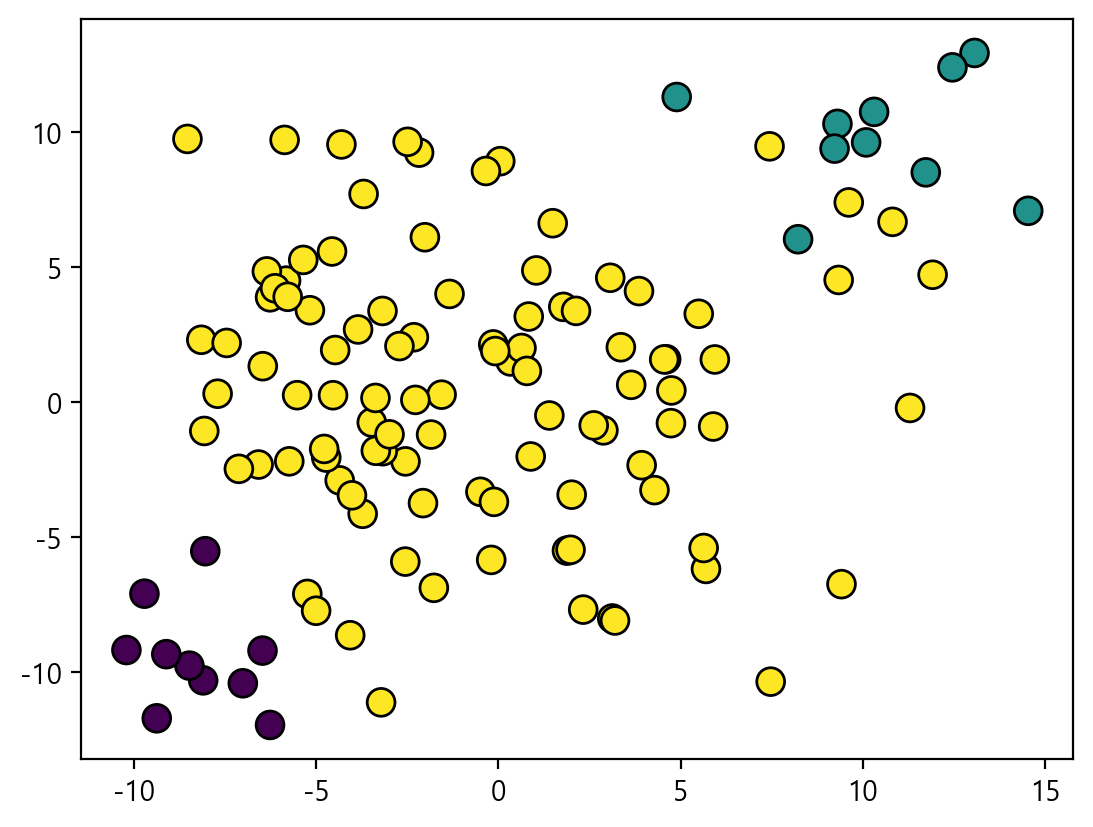

In [23]:
plt.scatter(x=data[:,0], y=data[:,1], c=data[:,2], s=100, edgecolors='k')
plt.show()

In [24]:
model = KMeans(n_clusters=3,
              init="k-means++",
              n_init="auto",
              max_iter=300)
model.fit(data[:, :2])

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto')

In [25]:
c = model.cluster_centers_ # 중심점
c

array([[-3.23795138,  3.79797742],
       [ 7.93234415,  5.526175  ],
       [-2.11638402, -5.40013046]])

In [26]:
pred = model.predict(data[:, :2]) # 모델이 클러스터링한 결과
pred = model.labels_

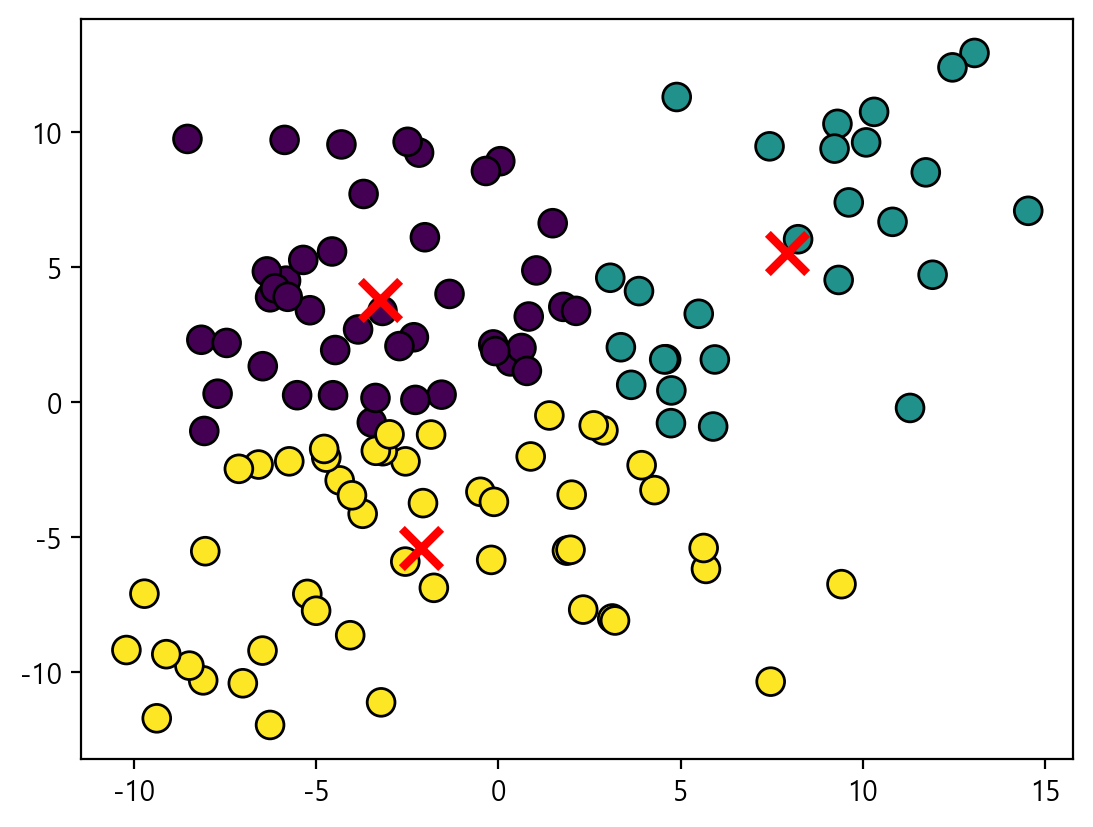

In [27]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100, edgecolors='k')
plt.scatter(x=c[:,0], y=c[:,1], c='r', marker='x', s=200, lw=3)
plt.show()

In [28]:
model = KMeans(n_clusters=6, init="k-means++", n_init=10)
model.fit(data[:, :2])

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=6, n_init=10)

In [29]:
c = model.cluster_centers_ # 중심점
pred = model.labels_  # 모델이 클러스터한 결과
pred

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0,
       4, 0, 4, 4, 1, 5, 5, 4, 4, 3, 1, 4, 4, 5, 1, 1, 4, 4, 0, 1, 2, 5,
       0, 0, 5, 5, 0, 5, 1, 0, 0, 4, 2, 2, 0, 0, 5, 5, 1, 5, 4, 0, 5, 4,
       4, 0, 5, 1, 4, 5, 2, 0, 4, 0, 4, 1, 1, 4, 0, 5, 0, 3, 5, 5, 1, 0,
       4, 4, 1, 3, 1, 4, 0, 4, 1, 5, 5, 2, 4, 5, 1, 1, 5, 5, 1, 4, 5, 5,
       4, 4, 4, 5, 4, 4, 4, 0, 1, 5])

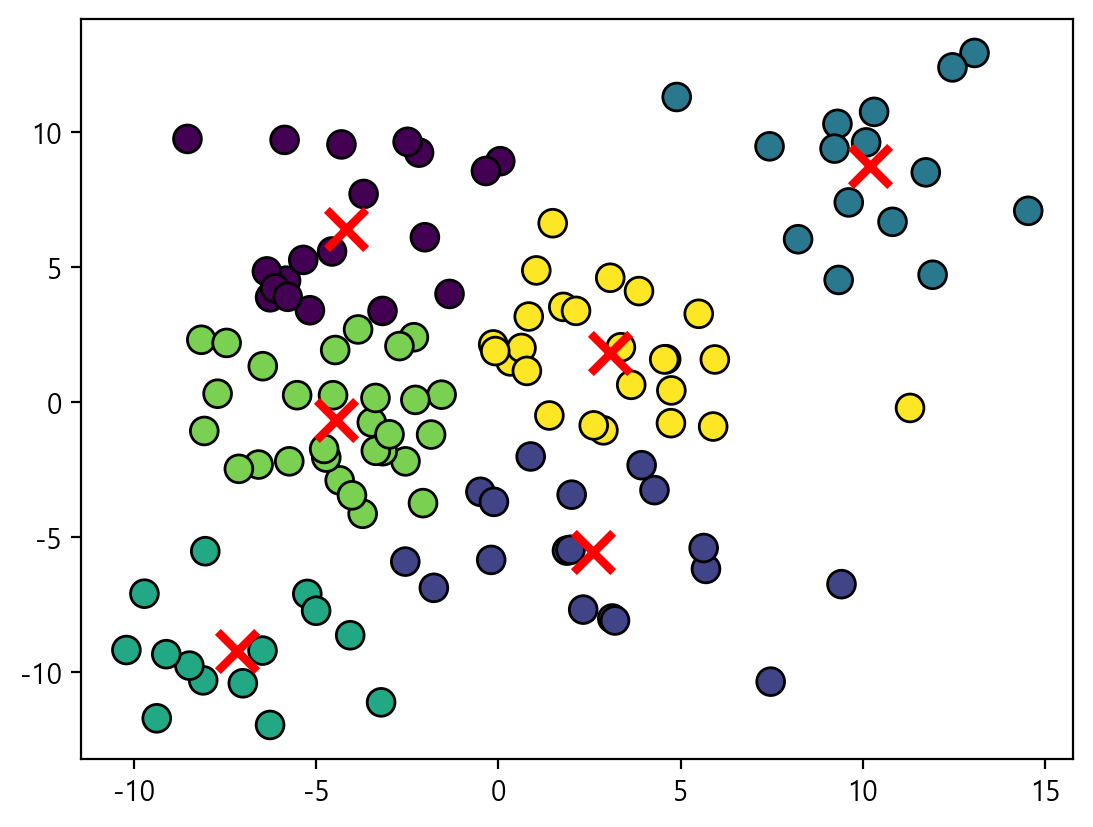

In [30]:
plt.scatter(x=data[:,0], y=data[:,1], c=pred, s=100, edgecolors='k')
plt.scatter(x=c[:,0], y=c[:,1], c='r', marker='x', s=200, lw=3)
plt.show()

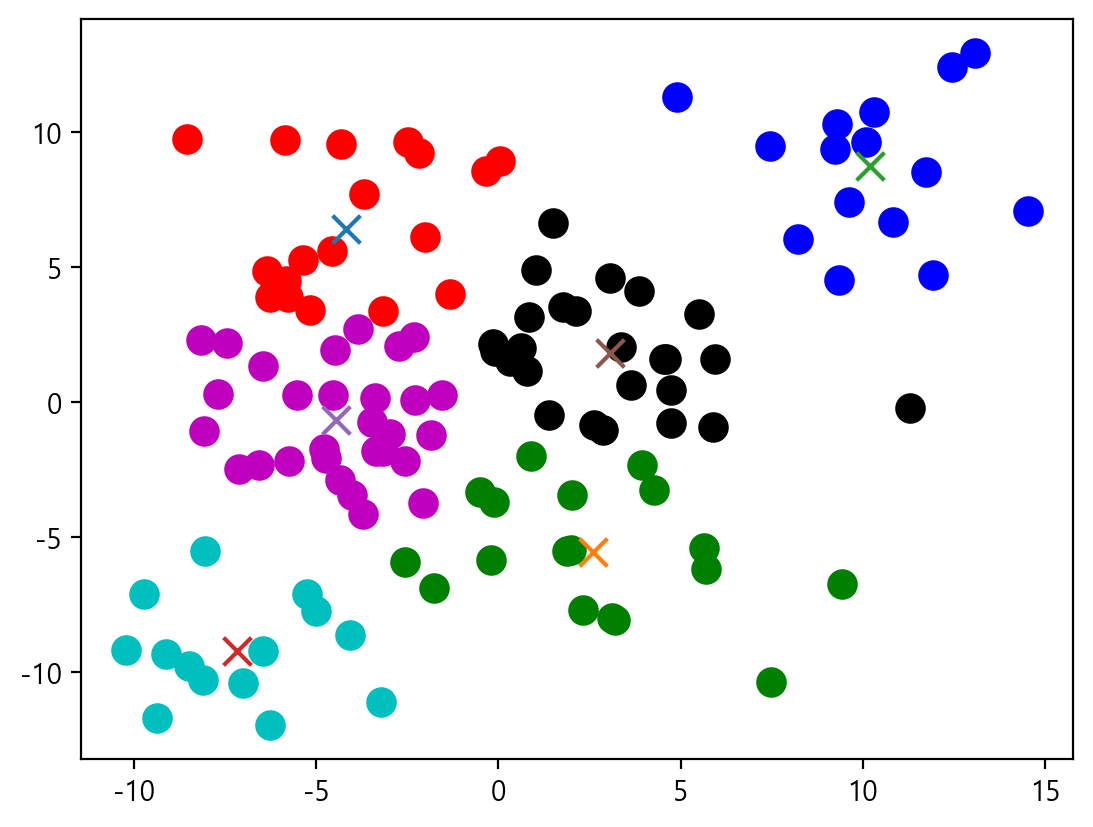

In [35]:
colors = ['r','g','b','c','m','k'] # 012345
for i in range(len(c)) :
    plt.scatter(x=data[pred==i, 0], y=data[pred==i, 1], c=colors[i], s=100)
    plt.scatter(x=c[i, 0], y=c[i,1], marker='x', s=100)

# 3절. Hierachical 클러스터링(계층적 군집)
- 군끼리 묶으면서 최종적으로 하나의 군집이 될 때까지 묶는 클러스터링
- 군집의 수를 미리 정해주지 않음
- 군집간의 거리 기반으로 클러스터링

In [36]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [37]:
# 계층적 군집 적용을 위해 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris.species = le.fit_transform(iris.species)

In [38]:
iris[::50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
100,6.3,3.3,6.0,2.5,2


In [39]:
from scipy.cluster.hierarchy import linkage
# method : 거리계산을 어떻게 할 지
# method="complete" : 두 클러스터에서 가장 먼 거리를 이용
# method="single" : 두 클러스터에서 가장 먼 거리를 이용
# method="average" : 두 클러스터내의 각 점에서 다른 클러스터의 모든 점의 평균거리 이용
cluster_model = linkage(iris, method="complete")

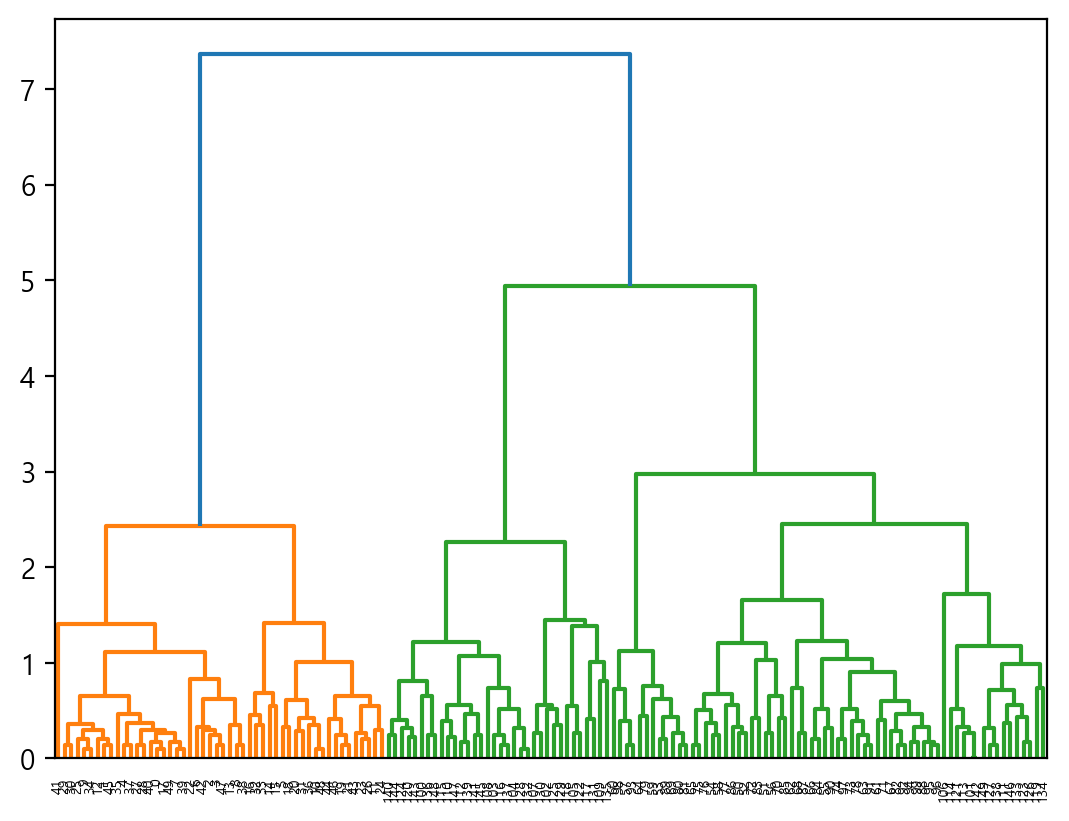

In [40]:
from scipy.cluster.hierarchy import dendrogram
dendrogram(cluster_model, labels=iris.index)
plt.savefig('data/ch02_iris.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
from scipy.cluster.hierarchy import fcluster # 군집화
fcluster(cluster_model, 
         t=4, # dendrogram의 y축의 값
         criterion="distance") # 군집화 기준
# criterion="distance" 일 때, t값은 dendrogram의 y축 값

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [42]:
fcluster(cluster_model,
        t=3,
        criterion="maxclust")
# criterion="maxclust" 일 때, t값은 클러스터의 갯수(군집화된 그룹 갯수)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [43]:
fcluster(cluster_model, 5, criterion="distance")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

# 4절. DBSCAN 클러스터링
- 연결 기반(밀도기반) 군집화 알고리즘(이상치를 자동 감지)
- 단점 : 클러스터의 밀도가 일정하지 않으면 성능이 낮아짐

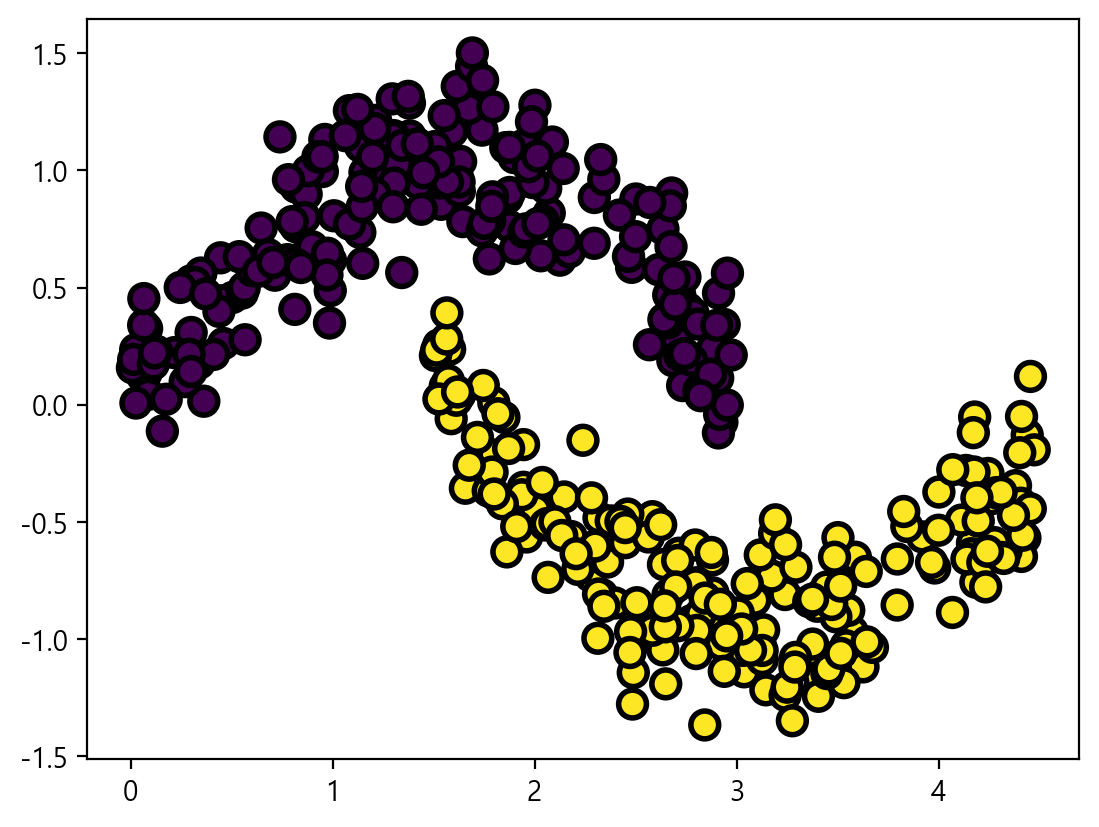

In [44]:
X1 = np.random.rand(200)*3 # 0<=X1<2의 실수 난수 200개
noise = np.random.normal(0, 0.2, 200)
Y1 = np.sin(X1) + noise
group1 = np.c_[X1, Y1, np.full(200, 0)]

X2 = X1 + 1.5
Y2 = np.cos(X2) + noise
group2 = np.c_[X2, Y2, np.full(200, 1)]
data = np.r_[group1, group2]

plt.scatter(data[:,0], data[:,1], c=data[:,2], s=100, edgecolors='k', lw=2)

In [45]:
data[::100]

array([[ 1.34254761,  0.56407413,  0.        ],
       [ 1.87658391,  0.90548735,  0.        ],
       [ 2.84254761, -1.36560829,  1.        ],
       [ 3.37658391, -1.02063918,  1.        ]])

In [46]:
from sklearn.cluster import DBSCAN
# 반경 0.3이내에 최소 10개는 있어야 군집 시작
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(data[:, :2])

DBSCAN(eps=0.3, min_samples=10)

In [47]:
labels = db.labels_   # 모델이 군집화한 결과 (-1은 이상치 인식)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 클러스터 수
n_noise_ = list(labels).count(-1)
print(f'이상치를 제외한 클러스터수 :{n_clusters_}, 이상치갯수:{n_noise_}개')

이상치를 제외한 클러스터수 :2, 이상치갯수:0개


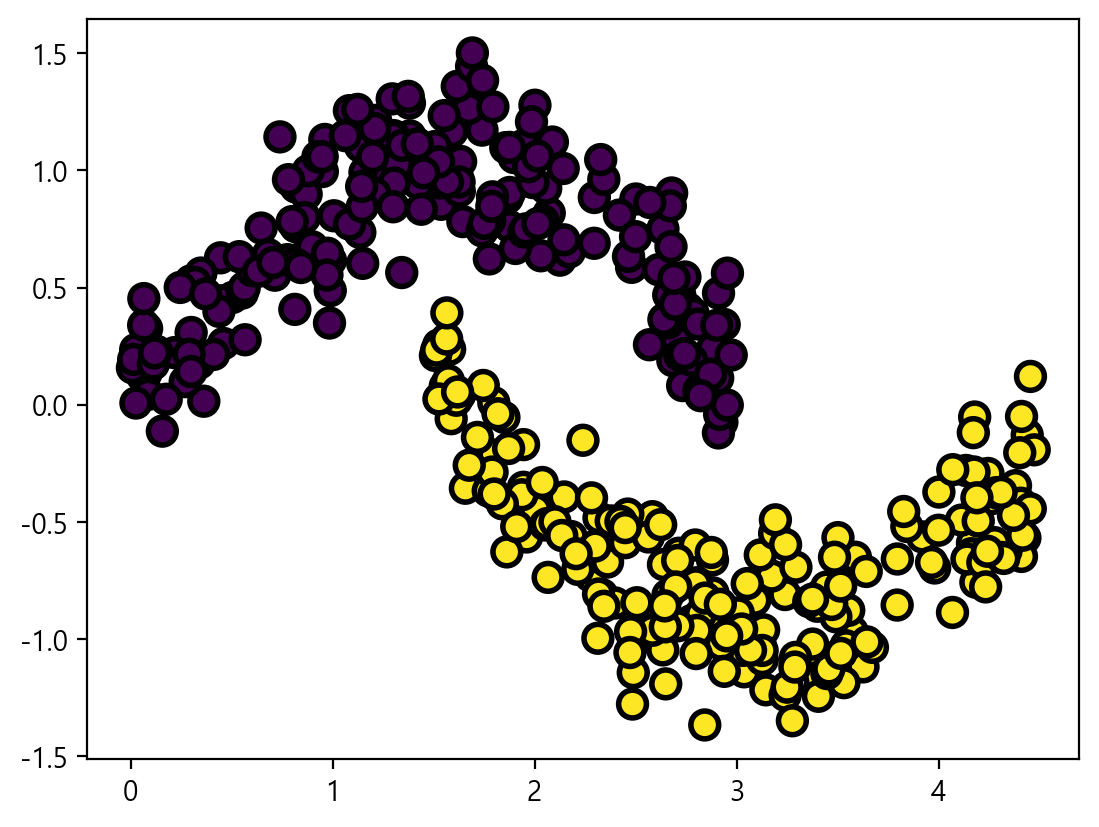

In [48]:
plt.scatter(data[:,0], data[:,1], c=labels, s=100, edgecolors='k', lw=2)

# 5절 모형 성능평가
- score메소드를 통해 예측 모형 평가(분류, 회귀. 군집에서는 안 씀)
- metrics 모듈의 메소드를 통해 군집 모형 평가
## 5.1 metrics 함수 이용
    - 클러스터의 소속과 개수를 모두 알고 있을 경우 평가

In [49]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
81,5.5,2.4,3.7,1.0,1


In [50]:
iris_X = iris.iloc[:,:-1]
iris_y = iris.iloc[:, -1]
iris_X.shape, iris_y.shape

((150, 4), (150,))

In [51]:
iris_model3 = KMeans(n_clusters=3, n_init=10, random_state=1)
iris_model3.fit(iris_X)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init=10, random_state=1)

In [52]:
pred = iris_model3.labels_
pred = iris_model3.predict(iris_X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [53]:
# pred 조정을 위해 : np.choose(배열시퀀스, 배열)
np.choose([3,2,2,3], [0, 10, 20, 30])

array([30, 20, 20, 30])

In [54]:
pred3 = np.choose(iris_model3.labels_, [1,0,2])
pred3 # 조정된 예측값

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [55]:
# 3개 cluster로 군집화한 자료
print('실제값 :', iris_y[::50])
print('예측값 :', pred3[::50])

실제값 : 0      0
50     1
100    2
Name: species, dtype: int32
예측값 : [0 1 2]


In [56]:
iris_model2 = KMeans(n_clusters=2, n_init=10, random_state=1)
iris_model2.fit(iris_X)

C:\Users\Admin\anaconda3\envs\ml-dl-nlp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, n_init=10, random_state=1)

In [57]:
pred2 = iris_model2.labels_

In [58]:
# 2개 cluster로 군집화한 자료
iris_y2 = np.array([0]*50 + [1]*100)
print('실제값 :', iris_y2)
print('예측값 :', pred2)

실제값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
예측값 : [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [59]:
# 클러스터가 3개인 경우 평가
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(labels_true=iris_y, # 실제값
                   labels_pred=pred3) # 클러스터링 예측

0.7302382722834697

In [60]:
# 클러스터가 2개인 경우 평가
adjusted_rand_score(labels_true=iris_y2,
                   labels_pred=pred2)

0.920405050901892